<center> <h2> Welcome to the Landslide Prediction Challenge</h2></center>
 A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties."
Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides"
<img src = "https://camo.githubusercontent.com/123fdaf8b500249dfb80004b3f43cc49135b8e68a9f53599c53ce8647ededd4e/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d312d387353493735414733484d38396e444a45776f365f4b4a6241455558532d72">
        "The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.,
 ***Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques***"
        "This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.

# 1. Import relevant libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
import random 

In [2]:
def seed_everything(seed=42): 
    random.seed(seed) 
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) 
seed_everything(42)

# 2. Load files

In [3]:
train = pd.read_csv('./input/Train.csv', index_col = 0)
test = pd.read_csv('./input/Test.csv', index_col = 0)
train.shape

(10864, 226)

# 3. Preview files

In [4]:
# Check the first five rows of the train set
train.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,130,129,127,126,123,126,125,124,122,119,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
2,161,158,155,153,151,162,159,155,153,151,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
3,149,151,154,156,158,154,157,158,160,161,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
4,80,78,77,75,73,80,78,77,75,73,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
5,117,115,114,112,110,115,113,111,110,108,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0


In [5]:
# Check the first five rows of the test set
test.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
Sample_ID,,,,,,,,,,,,,,,,,,,,,
10865,111,109,109,110,112,117,114,113,112,113,...,1.310084,1.310153,1.310199,1.310267,1.310313,1.309963,1.310031,1.310077,1.310146,1.310192
10866,189,187,186,185,185,187,186,184,183,183,...,1.332918,1.332943,1.332960,1.332985,1.333002,1.332823,1.332849,1.332865,1.332890,1.332907
10867,38,37,38,40,43,37,37,37,39,42,...,1.238290,1.238371,1.238492,1.238572,1.238693,1.238087,1.238167,1.238288,1.238369,1.238490
10868,134,136,137,138,140,132,133,134,136,138,...,1.300902,1.300895,1.300890,1.300883,1.300879,1.300930,1.300923,1.300919,1.300912,1.300907
10869,340,340,340,340,341,336,336,335,336,337,...,1.355660,1.355597,1.355503,1.355440,1.355345,1.355583,1.355520,1.355426,1.355363,1.355268


# 4. Data exploration

In [7]:
train['Label'].value_counts()

0    8148
1    2716
Name: Label, dtype: int64

* The dataset is highly imbalanced with the majority class having 75% and the minority class 25%
* Accuracy is not a good metric for this problem
* To handle the iblance i'm going to use some techniques such as SMOTE / Oversampling the minority class

In [9]:
# Check statistical summaries of the train set
train.describe()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,...,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,225.017489,224.925074,224.801730,224.673417,224.586156,225.050994,224.940630,224.792710,224.655468,224.575295,...,1.301055,1.301038,1.301020,1.301000,1.301055,1.301036,1.301018,1.301001,1.300983,0.250000
std,158.419265,158.337494,158.264168,158.217713,158.185548,158.421040,158.333362,158.253865,158.201409,158.165410,...,0.051938,0.051922,0.051905,0.051888,0.051981,0.051965,0.051949,0.051932,0.051916,0.433033
min,3.000000,3.000000,4.000000,2.000000,1.000000,3.000000,4.000000,4.000000,2.000000,1.000000,...,1.092410,1.092404,1.092393,1.092387,1.092354,1.092344,1.092337,1.092326,1.092320,0.000000
25%,101.750000,101.000000,101.000000,101.000000,101.000000,102.000000,101.000000,101.000000,101.000000,102.000000,...,1.286458,1.286418,1.286371,1.286364,1.286440,1.286447,1.286387,1.286365,1.286335,0.000000
50%,191.000000,192.000000,192.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,1.308175,1.308136,1.308103,1.308072,1.308206,1.308184,1.308142,1.308116,1.308085,0.000000
75%,312.000000,311.250000,312.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,1.331691,1.331653,1.331616,1.331562,1.331760,1.331731,1.331665,1.331633,1.331575,0.250000
max,901.000000,904.000000,907.000000,909.000000,912.000000,905.000000,908.000000,910.000000,910.000000,911.000000,...,1.370620,1.370627,1.370631,1.370637,1.370607,1.370612,1.370618,1.370623,1.370629,1.000000


* There is a very high correlation between features extracted from the same location

<Figure size 2000x1200 with 0 Axes>

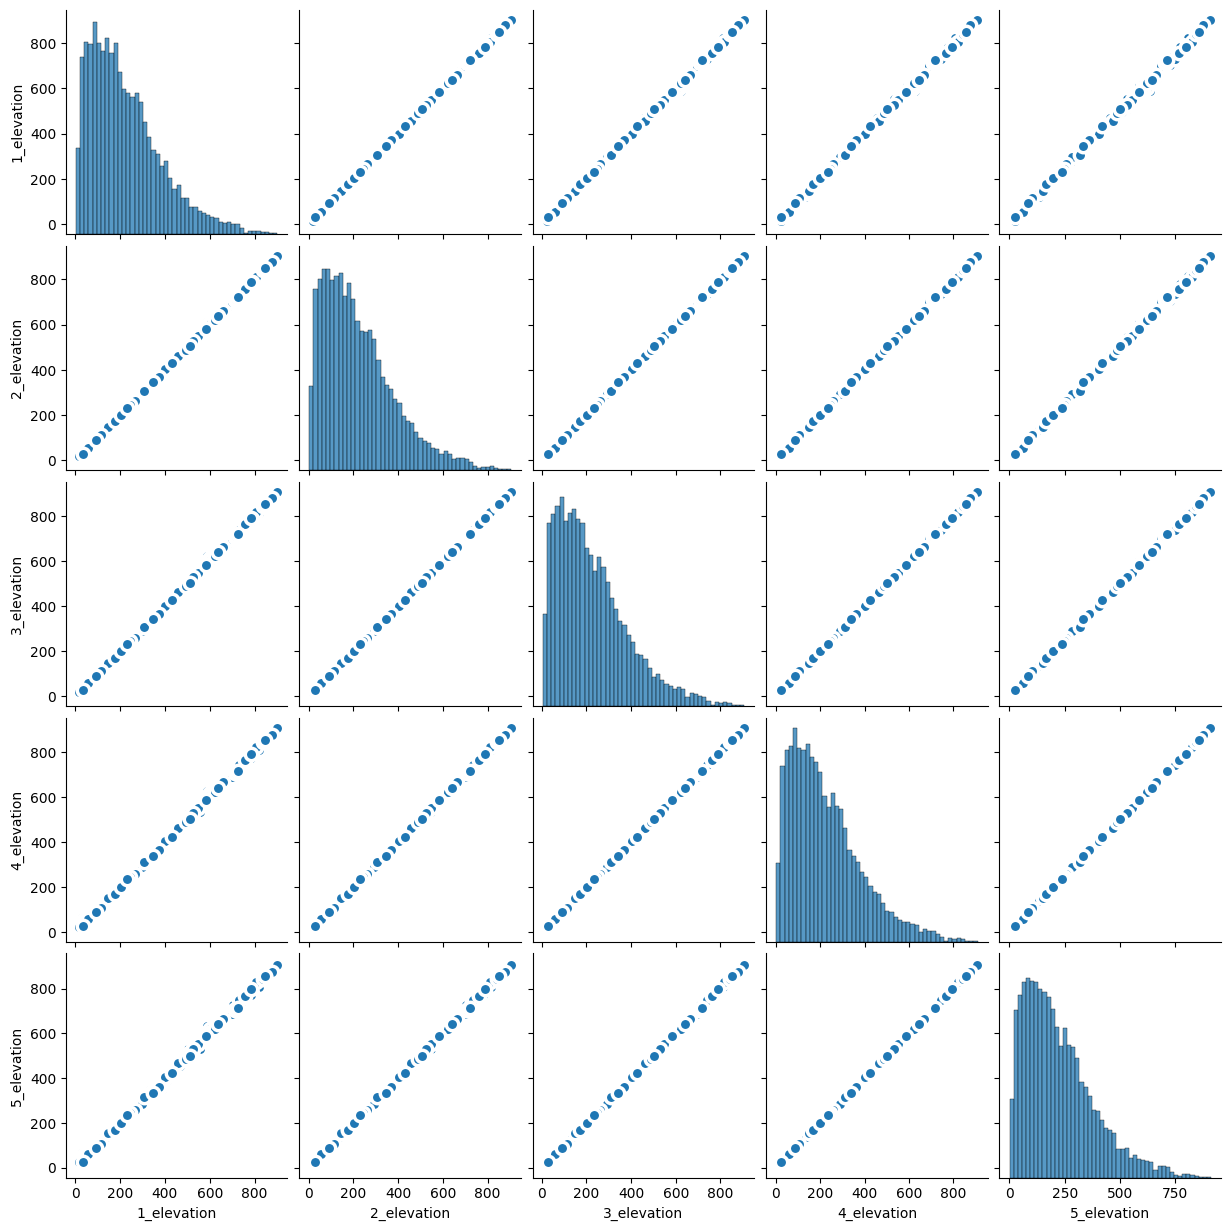

In [10]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation',	'2_elevation',	'3_elevation',	'4_elevation',	'5_elevation']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [11]:
# Check statistical summaries of the test set
test.describe()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,...,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000
mean,226.759300,226.586004,226.370534,226.189871,226.049355,226.825230,226.637017,226.399079,226.185083,226.037937,...,1.302698,1.302677,1.302659,1.302639,1.302619,1.302682,1.302661,1.302642,1.302622,1.302603
std,154.375714,154.249318,154.140357,154.044217,153.999267,154.382078,154.232252,154.115757,154.038464,153.998640,...,0.050228,0.050212,0.050197,0.050182,0.050167,0.050255,0.050238,0.050223,0.050208,0.050193
min,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,1.092869,1.092874,1.092878,1.092883,1.092886,1.092794,1.092799,1.092802,1.092807,1.092811
25%,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,1.287312,1.287300,1.287297,1.287274,1.287243,1.287333,1.287322,1.287299,1.287276,1.287259
50%,200.000000,199.000000,198.000000,198.000000,199.000000,199.000000,199.000000,199.000000,198.000000,198.500000,...,1.308596,1.308577,1.308564,1.308536,1.308500,1.308616,1.308592,1.308562,1.308523,1.308485
75%,315.000000,314.000000,314.000000,314.000000,314.000000,316.000000,315.000000,314.000000,314.000000,314.000000,...,1.332255,1.332209,1.332178,1.332165,1.332125,1.332278,1.332199,1.332140,1.332108,1.332110
max,903.000000,900.000000,894.000000,888.000000,882.000000,906.000000,903.000000,898.000000,891.000000,883.000000,...,1.370486,1.370493,1.370504,1.370511,1.370521,1.370474,1.370481,1.370492,1.370499,1.370509


In [12]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [13]:

elevation = ['1_elevation','2_elevation','3_elevation','4_elevation','5_elevation','6_elevation','7_elevation','8_elevation','9_elevation','10_elevation','11_elevation','12_elevation','13_elevation','14_elevation','15_elevation','16_elevation','17_elevation','18_elevation','19_elevation','20_elevation','21_elevation','22_elevation','23_elevation','24_elevation','25_elevation']

train['elevation_mean'] = train[elevation].values.mean(axis=1)
train['elevation_min'] = train[elevation].values.min(axis=1)
train['elevation_max'] = train[elevation].values.max(axis=1)


elevation = ['1_elevation','2_elevation','3_elevation','4_elevation','5_elevation','6_elevation','7_elevation','8_elevation','9_elevation','10_elevation','11_elevation','12_elevation','13_elevation','14_elevation','15_elevation','16_elevation','17_elevation','18_elevation','19_elevation','20_elevation','21_elevation','22_elevation','23_elevation','24_elevation','25_elevation']

test['elevation_mean'] = test[elevation].values.mean(axis=1)
test['elevation_min'] = test[elevation].values.min(axis=1)
test['elevation_max'] = test[elevation].values.max(axis=1)



aspect = ['1_aspect','2_aspect','3_aspect','4_aspect','5_aspect','6_aspect','7_aspect','8_aspect','9_aspect','10_aspect','11_aspect','12_aspect','13_aspect','14_aspect','15_aspect','16_aspect','17_aspect','18_aspect','19_aspect','20_aspect','21_aspect','22_aspect','23_aspect','24_aspect','25_aspect',]

train['aspect_mean'] = train[aspect].values.mean(axis=1)
train['aspect_min'] = train[aspect].values.min(axis=1)
train['aspect_max'] = train[aspect].values.max(axis=1)




aspect = ['1_aspect','2_aspect','3_aspect','4_aspect','5_aspect','6_aspect','7_aspect','8_aspect','9_aspect','10_aspect','11_aspect','12_aspect','13_aspect','14_aspect','15_aspect','16_aspect','17_aspect','18_aspect','19_aspect','20_aspect','21_aspect','22_aspect','23_aspect','24_aspect','25_aspect',]

test['aspect_mean'] = test[aspect].values.mean(axis=1)
test['aspect_min'] = test[aspect].values.min(axis=1)
test['aspect_max'] = test[aspect].values.max(axis=1)



slope = ['1_slope','2_slope','3_slope','4_slope','5_slope','6_slope','7_slope','8_slope','9_slope','10_slope','11_slope','12_slope','13_slope','14_slope','15_slope','16_slope','17_slope','18_slope','19_slope','20_slope','21_slope','22_slope','23_slope','24_slope','25_slope',]

train['slope_mean'] = train[slope].values.mean(axis=1)
train['slope_min'] = train[slope].values.min(axis=1)
train['slope_max'] = train[slope].values.max(axis=1)



slope = ['1_slope','2_slope','3_slope','4_slope','5_slope','6_slope','7_slope','8_slope','9_slope','10_slope','11_slope','12_slope','13_slope','14_slope','15_slope','16_slope','17_slope','18_slope','19_slope','20_slope','21_slope','22_slope','23_slope','24_slope','25_slope',]

test['slope_mean'] = test[slope].values.mean(axis=1)
test['slope_min'] = test[slope].values.min(axis=1)
test['slope_max'] = test[slope].values.max(axis=1)



placurv = ['1_placurv','2_placurv','3_placurv','4_placurv','5_placurv','6_placurv','7_placurv','8_placurv','9_placurv','10_placurv','11_placurv','12_placurv','13_placurv','14_placurv','15_placurv','16_placurv','17_placurv','18_placurv','19_placurv','20_placurv','21_placurv','22_placurv','23_placurv','24_placurv','25_placurv',]

train['placurv_mean'] = train[placurv].values.mean(axis=1)
train['placurv_min'] = train[placurv].values.min(axis=1)
train['placurv_max'] = train[placurv].values.max(axis=1)



placurv = ['1_placurv','2_placurv','3_placurv','4_placurv','5_placurv','6_placurv','7_placurv','8_placurv','9_placurv','10_placurv','11_placurv','12_placurv','13_placurv','14_placurv','15_placurv','16_placurv','17_placurv','18_placurv','19_placurv','20_placurv','21_placurv','22_placurv','23_placurv','24_placurv','25_placurv',]

train['placurv_mean'] = train[placurv].values.mean(axis=1)
train['placurv_min'] = train[placurv].values.min(axis=1)
train['placurv_max'] = train[placurv].values.max(axis=1)



placurv = ['1_placurv','2_placurv','3_placurv','4_placurv','5_placurv','6_placurv','7_placurv','8_placurv','9_placurv','10_placurv','11_placurv','12_placurv','13_placurv','14_placurv','15_placurv','16_placurv','17_placurv','18_placurv','19_placurv','20_placurv','21_placurv','22_placurv','23_placurv','24_placurv','25_placurv',]

test['placurv_mean'] = test[placurv].values.mean(axis=1)
test['placurv_min'] = test[placurv].values.min(axis=1)
test['placurv_max'] = test[placurv].values.max(axis=1)



procurv = ['1_procurv','2_procurv','3_procurv','4_procurv','5_procurv','6_procurv','7_procurv','8_procurv','9_procurv','10_procurv','11_procurv','12_procurv','13_procurv','14_procurv','15_procurv','16_procurv','17_procurv','18_procurv','19_procurv','20_procurv','21_procurv','22_procurv','23_procurv','24_procurv','25_procurv',]

train['procurv_mean'] = train[procurv].values.mean(axis=1)
train['procurv_min'] = train[procurv].values.min(axis=1)
train['procurv_max'] = train[procurv].values.max(axis=1)



procurv = ['1_procurv','2_procurv','3_procurv','4_procurv','5_procurv','6_procurv','7_procurv','8_procurv','9_procurv','10_procurv','11_procurv','12_procurv','13_procurv','14_procurv','15_procurv','16_procurv','17_procurv','18_procurv','19_procurv','20_procurv','21_procurv','22_procurv','23_procurv','24_procurv','25_procurv',]

test['procurv_mean'] = test[procurv].values.mean(axis=1)
test['procurv_min'] = test[procurv].values.min(axis=1)
test['procurv_max'] = test[procurv].values.max(axis=1)



lsfactor = ['1_lsfactor','2_lsfactor','3_lsfactor','4_lsfactor','5_lsfactor','6_lsfactor','7_lsfactor','8_lsfactor','9_lsfactor','10_lsfactor','11_lsfactor','12_lsfactor','13_lsfactor','14_lsfactor','15_lsfactor','16_lsfactor','17_lsfactor','18_lsfactor','19_lsfactor','20_lsfactor','21_lsfactor','22_lsfactor','23_lsfactor','24_lsfactor','25_lsfactor',]

train['lsfactor_mean'] = train[lsfactor].values.mean(axis=1)
train['lsfactor_min'] = train[lsfactor].values.min(axis=1)
train['lsfactor_max'] = train[lsfactor].values.max(axis=1)



lsfactor = ['1_lsfactor','2_lsfactor','3_lsfactor','4_lsfactor','5_lsfactor','6_lsfactor','7_lsfactor','8_lsfactor','9_lsfactor','10_lsfactor','11_lsfactor','12_lsfactor','13_lsfactor','14_lsfactor','15_lsfactor','16_lsfactor','17_lsfactor','18_lsfactor','19_lsfactor','20_lsfactor','21_lsfactor','22_lsfactor','23_lsfactor','24_lsfactor','25_lsfactor',]

test['lsfactor_mean'] = test[lsfactor].values.mean(axis=1)
test['lsfactor_min'] = test[lsfactor].values.min(axis=1)
test['lsfactor_max'] = test[lsfactor].values.max(axis=1)



twi = ['1_twi','2_twi','3_twi','4_twi','5_twi','6_twi','7_twi','8_twi','9_twi','10_twi','11_twi','12_twi','13_twi','14_twi','15_twi','16_twi','17_twi','18_twi','19_twi','20_twi','21_twi','22_twi','23_twi','24_twi','25_twi',]

train['twi_mean'] = train[twi].values.mean(axis=1)
train['twi_min'] = train[twi].values.min(axis=1)
train['twi_max'] = train[twi].values.max(axis=1)



twi = ['1_twi','2_twi','3_twi','4_twi','5_twi','6_twi','7_twi','8_twi','9_twi','10_twi','11_twi','12_twi','13_twi','14_twi','15_twi','16_twi','17_twi','18_twi','19_twi','20_twi','21_twi','22_twi','23_twi','24_twi','25_twi',]

test['twi_mean'] = test[twi].values.mean(axis=1)
test['twi_min'] = test[twi].values.min(axis=1)
test['twi_max'] = test[twi].values.max(axis=1)



sdoif = ['1_sdoif','2_sdoif','3_sdoif','4_sdoif','5_sdoif','6_sdoif','7_sdoif','8_sdoif','9_sdoif','10_sdoif','11_sdoif','12_sdoif','13_sdoif','14_sdoif','15_sdoif','16_sdoif','17_sdoif','18_sdoif','19_sdoif','20_sdoif','21_sdoif','22_sdoif','23_sdoif','24_sdoif','25_sdoif',]

train['sdoif_mean'] = train[sdoif].values.mean(axis=1)
train['sdoif_min'] = train[sdoif].values.min(axis=1)
train['sdoif_max'] = train[sdoif].values.max(axis=1)


sdoif = ['1_sdoif','2_sdoif','3_sdoif','4_sdoif','5_sdoif','6_sdoif','7_sdoif','8_sdoif','9_sdoif','10_sdoif','11_sdoif','12_sdoif','13_sdoif','14_sdoif','15_sdoif','16_sdoif','17_sdoif','18_sdoif','19_sdoif','20_sdoif','21_sdoif','22_sdoif','23_sdoif','24_sdoif','25_sdoif',]

test['sdoif_mean'] = test[sdoif].values.mean(axis=1)
test['sdoif_min'] = test[sdoif].values.min(axis=1)
test['sdoif_max'] = test[sdoif].values.max(axis=1)



In [14]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(True, True)

# 6. Features Engineering

In [15]:
def calc_total(name,DataFrame):
    DataFrame['total_'+name] = 0
    for i in range(1,26):
        DataFrame['total_'+name] +=  DataFrame[str(i)+'_'+name]
    return DataFrame
train=calc_total('slope',train)
test=calc_total('slope',test)
train=calc_total('aspect',train)
test=calc_total('aspect',test)
train=calc_total('elevation',train)
test=calc_total('elevation',test)
train=calc_total('sdoif',train)
test=calc_total('sdoif',test)
train=calc_total('lsfactor',train)
test=calc_total('lsfactor',test)
#train=calc_total('twi',train)
#test=calc_total('twi',test)
#train=calc_total('placurv',train)
#test=calc_total('placurv',test)
train=calc_total('procurv',train)
test=calc_total('procurv',test)

def slope_range(DataFrame):
    DataFrame['slope_range'] = 0
    for i in range(1,26):
        DataFrame['slope_range'] +=  ((DataFrame[str(i)+'_slope'] < 15) | (DataFrame[str(i)+'_slope'] > 45)).astype(int)
    return DataFrame

def delete_range(DataFrame,name):
    gonnaDrop =[]
    for i in range(1,26):
        gonnaDrop.append(str(i)+'_'+name)
    return DataFrame.drop(columns=gonnaDrop)

train=delete_range(train,'procurv')
test=delete_range(test,'procurv')



train.head(10)

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,...,twi_max,sdoif_mean,sdoif_min,sdoif_max,total_slope,total_aspect,total_elevation,total_sdoif,total_lsfactor,total_procurv
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,130,129,127,126,123,126,125,124,122,119,...,4.218082,1.281733,1.281649,1.281811,920.759220,2921.61402,2986,32.043332,225.342353,-0.222866
2,161,158,155,153,151,162,159,155,153,151,...,5.175152,1.359578,1.359463,1.359683,713.116670,4615.83590,3905,33.989444,200.345615,-0.095545
3,149,151,154,156,158,154,157,158,160,161,...,5.951684,1.365054,1.364937,1.365161,958.406450,7123.56090,4064,34.126354,273.950444,0.561299
4,80,78,77,75,73,80,78,77,75,73,...,4.421484,1.100818,1.100630,1.101023,481.782970,4326.91120,1910,27.520452,94.642992,0.222366
5,117,115,114,112,110,115,113,111,110,108,...,5.617533,1.284221,1.283876,1.284558,706.448440,3137.81430,2729,32.105513,193.563024,-0.191980
6,308,310,314,317,319,303,307,310,313,315,...,5.197584,1.325807,1.325583,1.326038,902.150370,1299.87059,7670,33.145168,232.224687,-0.378038
7,130,130,130,130,129,132,132,132,132,132,...,8.762563,1.321409,1.321097,1.321719,400.763856,4376.02138,3276,33.035228,65.038096,0.079556
8,141,139,137,135,132,143,141,139,136,133,...,3.818215,1.287978,1.287891,1.288072,721.340640,5193.41470,3491,32.199448,158.709341,0.327065
9,100,102,104,106,109,100,102,104,107,109,...,7.761856,1.303115,1.303027,1.303197,583.689600,6060.76330,2602,32.577881,221.857850,-0.001375


In [16]:
ls=['1','2','3','4','5','6','11','16','21','22','23','24','25','10','15','20']
ls=['1','2','3','4','5','21','22','23','24','25']
ls=['1','5','21','25']
for i in ls:
    #elevation = i + '_elevation' 
    train.drop(labels= i+'_elevation', axis= 1, inplace=True)
    test.drop(labels= i+'_elevation', axis= 1, inplace=True)
    train.drop(labels= i+'_slope', axis= 1, inplace=True)
    test.drop(labels= i+'_slope', axis= 1, inplace=True)
    train.drop(labels= i+'_aspect', axis= 1, inplace=True)
    test.drop(labels= i+'_aspect', axis= 1, inplace=True)          
    train.drop(labels= i+'_lsfactor', axis= 1, inplace=True)
    test.drop(labels= i+'_lsfactor', axis= 1, inplace=True) 
    train.drop(labels= i+'_twi', axis= 1, inplace=True)
    test.drop(labels= i+'_twi', axis= 1, inplace=True)
    train.drop(labels= i+'_sdoif', axis= 1, inplace=True)
    test.drop(labels= i+'_sdoif', axis= 1, inplace=True)

ls1=['1','2','3','4','5','6','11','16','21','22','23','24','25','10','15','20']
ls=['1','5','21','25']
for i in ls1:
    train.drop(labels= i+'_placurv', axis= 1, inplace=True)
    test.drop(labels= i+'_placurv', axis= 1, inplace=True)
    #train.drop(labels= i+'_procurv', axis= 1, inplace=True)
    #test.drop(labels= i+'_procurv', axis= 1, inplace=True)

ls1=['1','2','3','4','5','6','7','8','9','10','11','12','14','15','16','17','18','19','20','21','22','23','24','25']
for i in ls1:
    train.drop(labels= i+'_geology', axis= 1, inplace=True)
    test.drop(labels= i+'_geology', axis= 1, inplace=True)

In [17]:
ls = [
    '8_elevation',
    '8_sdoif',
    '12_sdoif',
    '6_sdoif',
    '19_sdoif',
    '13_elevation',
    'total_sdoif',
    '17_elevation',
    'procurv_mean',
    '15_elevation',
    'elevation_max',
    'lsfactor_mean',
    '2_sdoif',
    '18_sdoif'
]

for i in ls:
    train.drop(labels=i, axis=1, inplace=True)
    test.drop(labels=i, axis=1, inplace=True)

In [18]:
train.head(10)

,2_elevation,3_elevation,4_elevation,6_elevation,7_elevation,9_elevation,10_elevation,11_elevation,12_elevation,14_elevation,...,twi_min,twi_max,sdoif_mean,sdoif_min,sdoif_max,total_slope,total_aspect,total_elevation,total_lsfactor,total_procurv
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,129,127,126,126,125,122,119,122,121,117,...,2.915506,4.218082,1.281733,1.281649,1.281811,920.759220,2921.61402,2986,225.342353,-0.222866
2,158,155,153,162,159,153,151,162,159,153,...,4.109311,5.175152,1.359578,1.359463,1.359683,713.116670,4615.83590,3905,200.345615,-0.095545
3,151,154,156,154,157,160,161,162,164,164,...,2.413693,5.951684,1.365054,1.364937,1.365161,958.406450,7123.56090,4064,273.950444,0.561299
4,78,77,75,80,78,75,73,80,78,75,...,3.015849,4.421484,1.100818,1.100630,1.101023,481.782970,4326.91120,1910,94.642992,0.222366
5,115,114,112,115,113,110,108,112,111,107,...,3.523277,5.617533,1.284221,1.283876,1.284558,706.448440,3137.81430,2729,193.563024,-0.191980
6,310,314,317,303,307,313,315,300,303,310,...,2.858084,5.197584,1.325807,1.325583,1.326038,902.150370,1299.87059,7670,232.224687,-0.378038
7,130,130,130,132,132,132,132,131,132,133,...,2.302222,8.762563,1.321409,1.321097,1.321719,400.763856,4376.02138,3276,65.038096,0.079556
8,139,137,135,143,141,136,133,145,143,137,...,2.880001,3.818215,1.287978,1.287891,1.288072,721.340640,5193.41470,3491,158.709341,0.327065
9,102,104,106,100,102,107,109,99,102,106,...,4.050908,7.761856,1.303115,1.303027,1.303197,583.689600,6060.76330,2602,221.857850,-0.001375


# 8. Model Building

## Oversampling

In [19]:
X = train.loc[:, train.columns != 'Label' ]
y = train.Label

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
X_resampled = pd.DataFrame(X_over, columns=X.columns)
y_resampled = pd.DataFrame(y_over, columns=['Label'])

## Model : CatBoost

In [22]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

errcb2 = []
y_pred_totcb2 = []
fold=StratifiedKFold(n_splits=5)

i=1
for train_index, test_index in fold.split(X_resampled,y_resampled):
    
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    m2  = CatBoostClassifier(n_estimators=800,
                             eval_metric='Accuracy',
                             od_wait=200,
                             learning_rate=0.1,
                             bootstrap_type='Bernoulli',
                             metric_period=50,
                             max_depth = 8)
    
    m2.fit(X_train,
           y_train,
           eval_set=[(X_train,y_train), (X_test, y_test)],
           early_stopping_rounds=200,
           verbose=100)
    
    preds = m2.predict(X_test)
    
    print("Accuracy: ", (accuracy_score(y_test,preds)))
    
    errcb2.append((accuracy_score(y_test,preds)))    
    p2 = m2.predict(test)
    y_pred_totcb2.append(p2)
    
np.mean(errcb2)

0:	learn: 0.7654956	test: 0.7654956	test1: 0.7604294	best: 0.7604294 (0)	total: 96ms	remaining: 1m 16s
100:	learn: 0.9321878	test: 0.9321878	test1: 0.8843558	best: 0.8843558 (97)	total: 5.3s	remaining: 36.7s
200:	learn: 0.9848880	test: 0.9848880	test1: 0.9171779	best: 0.9177914 (194)	total: 10.6s	remaining: 31.7s
300:	learn: 0.9987726	test: 0.9987726	test1: 0.9273006	best: 0.9279141 (298)	total: 15.8s	remaining: 26.2s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9291411	best: 0.9315951 (349)	total: 21s	remaining: 20.9s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9285276	best: 0.9315951 (349)	total: 26.2s	remaining: 15.7s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9328221	best: 0.9337423 (562)	total: 31.5s	remaining: 10.4s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9319018	best: 0.9343558 (626)	total: 37.4s	remaining: 5.28s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9340491	best: 0.9343558 (626)	total: 43.3s	remaining: 0us

bestTest = 0.9343558282
bestIteration = 626

S

0:	learn: 0.7608345	test: 0.7608345	test1: 0.7477754	best: 0.7477754 (0)	total: 52.5ms	remaining: 41.9s
100:	learn: 0.9292782	test: 0.9292782	test1: 0.8720466	best: 0.8720466 (100)	total: 5.47s	remaining: 37.9s
200:	learn: 0.9832017	test: 0.9832017	test1: 0.9076404	best: 0.9088678 (196)	total: 11s	remaining: 32.8s
300:	learn: 0.9985426	test: 0.9985426	test1: 0.9248236	best: 0.9251304 (286)	total: 16.4s	remaining: 27.3s
400:	learn: 1.0000000	test: 1.0000000	test1: 0.9309604	best: 0.9315741 (399)	total: 22.2s	remaining: 22.1s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9306536	best: 0.9315741 (399)	total: 27.8s	remaining: 16.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9315741025
bestIteration = 399

Shrink model to first 400 iterations.
Accuracy:  0.9315741024854249


0:	learn: 0.7586868	test: 0.7586868	test1: 0.7582080	best: 0.7582080 (0)	total: 62.7ms	remaining: 50.1s
100:	learn: 0.9301220	test: 0.9301220	test1: 0.8935256	best: 0.8935256 (100)	total: 5.5s	remaining: 38.1s
200:	learn: 0.9840454	test: 0.9840454	test1: 0.9281988	best: 0.9281988 (196)	total: 11s	remaining: 32.8s
300:	learn: 0.9984659	test: 0.9984659	test1: 0.9398589	best: 0.9404725 (298)	total: 16.6s	remaining: 27.5s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9441546	best: 0.9444615 (383)	total: 22.2s	remaining: 22.1s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9484504	best: 0.9487573 (497)	total: 27.8s	remaining: 16.6s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9490641	best: 0.9499847 (582)	total: 33.4s	remaining: 11.1s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9505983	best: 0.9509052 (650)	total: 39s	remaining: 5.51s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9512120	best: 0.9521326 (731)	total: 44.5s	remaining: 0us

bestTest = 0.952132556
bestIteration = 731

Sh

0:	learn: 0.7543146	test: 0.7543146	test1: 0.7450138	best: 0.7450138 (0)	total: 59.5ms	remaining: 47.6s
100:	learn: 0.9298151	test: 0.9298151	test1: 0.8929119	best: 0.8935256 (98)	total: 5.53s	remaining: 38.3s
200:	learn: 0.9851193	test: 0.9851193	test1: 0.9300399	best: 0.9303467 (198)	total: 11s	remaining: 32.8s
300:	learn: 0.9982358	test: 0.9982358	test1: 0.9401657	best: 0.9420068 (293)	total: 16.6s	remaining: 27.5s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9435410	best: 0.9447683 (371)	total: 22.1s	remaining: 22s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9450752	best: 0.9466094 (476)	total: 27.6s	remaining: 16.5s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9463025	best: 0.9466094 (476)	total: 32.9s	remaining: 10.9s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9472231	best: 0.9478368 (675)	total: 38.3s	remaining: 5.41s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9459957	best: 0.9478368 (675)	total: 43.7s	remaining: 0us

bestTest = 0.9478367597
bestIteration = 675

S

0:	learn: 0.7529340	test: 0.7529340	test1: 0.7370359	best: 0.7370359 (0)	total: 74.2ms	remaining: 59.3s
100:	learn: 0.9273606	test: 0.9273606	test1: 0.8830930	best: 0.8830930 (100)	total: 5.39s	remaining: 37.3s
200:	learn: 0.9844289	test: 0.9844289	test1: 0.9263578	best: 0.9266646 (195)	total: 10.8s	remaining: 32.1s
300:	learn: 0.9979290	test: 0.9979290	test1: 0.9398589	best: 0.9398589 (300)	total: 16.2s	remaining: 26.9s
400:	learn: 0.9999233	test: 0.9999233	test1: 0.9450752	best: 0.9459957 (396)	total: 21.6s	remaining: 21.5s
500:	learn: 1.0000000	test: 1.0000000	test1: 0.9478368	best: 0.9478368 (490)	total: 27s	remaining: 16.1s
600:	learn: 1.0000000	test: 1.0000000	test1: 0.9484504	best: 0.9490641 (539)	total: 32.5s	remaining: 10.8s
700:	learn: 1.0000000	test: 1.0000000	test1: 0.9499847	best: 0.9502915 (653)	total: 37.9s	remaining: 5.35s
799:	learn: 1.0000000	test: 1.0000000	test1: 0.9499847	best: 0.9505983 (730)	total: 43.2s	remaining: 0us

bestTest = 0.9505983431
bestIteration = 730

0.9432995178994649

# 9. Feature importance

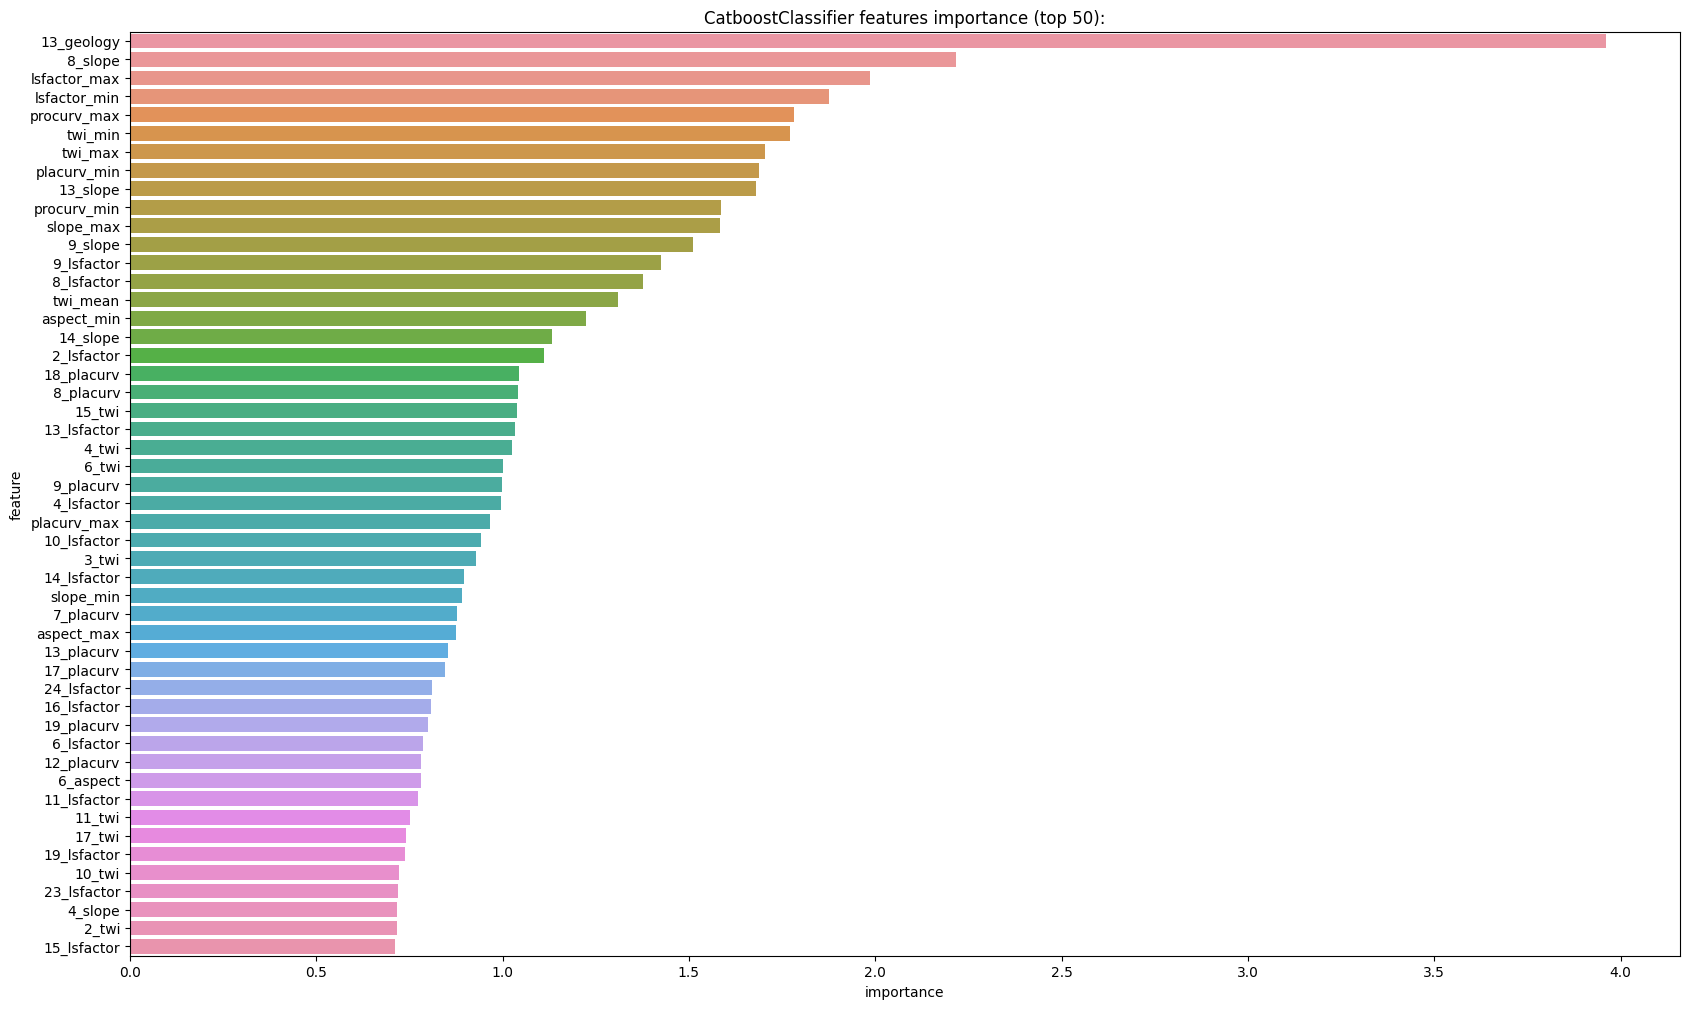

In [26]:
feature_importance_df = pd.DataFrame(m2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):');

In [27]:
GonnaBeDeleted = feature_importance_df.sort_values(by = ['importance'], ascending = True).head(30)
GonnaBeDeleted = GonnaBeDeleted['feature'].tail(75)
GonnaBeDeleted.tolist()

['total_aspect',
 '8_aspect',
 '20_aspect',
 '18_aspect',
 '9_aspect',
 'elevation_mean',
 'aspect_mean',
 'sdoif_max',
 'total_elevation',
 'sdoif_mean',
 '16_sdoif',
 '15_sdoif',
 '13_aspect',
 '23_elevation',
 '24_sdoif',
 '16_slope',
 '22_slope',
 '18_slope',
 '17_slope',
 '4_sdoif',
 '12_elevation',
 '14_aspect',
 '14_elevation',
 '17_sdoif',
 '16_elevation',
 '23_aspect',
 '18_elevation',
 '7_slope',
 '6_elevation',
 '14_sdoif']

# 10. Submission

In [30]:
predictions = pd.DataFrame(y_pred_totcb2)
predictions = np.mean(predictions, axis=0)

submission = pd.DataFrame()
submission['id'] = test.index
submission['Label'] = pd.DataFrame(predictions.T)
submission.to_csv('./output/catboost_test_preds.csv', index=False)

submission['Label'] = np.where(submission['Label'] > 0.3, 1, 0)
submission.to_csv('./output/catboost_sub_v2.csv', index=False)